In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import csv

In [20]:
# To make things easier, convert to csv. 
# This specifi .dat file is a mess, looses data when opening up as a .dat...

datContent = [i.strip().split() for i in open("./data/AllStations_temperature_h_2019.dat").readlines()]
with open("./data/AllStations_temperature_h_2019.csv", "wt") as f: 
    writer = csv.writer(f)
    writer.writerows(datContent)

### Importing the data and preparing it so that it can be used for analysis

In [67]:
# Import the data
hour_data_file = './data/AllStations_temperature_h_2019.csv'
hour_data = pd.read_csv(hour_data_file, header=None)

# Rename columns to show the weather station name
hour_data.rename(columns={0: "Timestamp",1:"Brentwood", 2:"CalRevelle", 4:"Colquitz", 3:"CampusView", 5:"Colwood",
6:"CordovaBay", 7:"CrystalView", 8:"DeepCove", 9:"Doncaster", 10:"EdwardMilne", 11:"Esquimalt", 12:"FrancesKelsey",
13:"FrankHobbs", 14:"HappyValley", 15:"Helgesen",16:"JamesBay", 17:"JohnMuir", 18:"Journey", 19:"Keating",20:"Kelset",
21:"LakeHill",22:"Lakewood",24:"Lochside", 23:"Lansdown",25:"Macaulay", 26:"MargaretJenkins",
27:"Monterey", 28:"Parkland",29:"Quadra",30:"Reynolds",31:"Rogers",32:"Sangster",33:"ShawniganSchool",
34:"Shoreline",35:"Sidney",36:"Torquay", 37:"UVicSci",38:"Willows",39:"Willway"},inplace=True)

# The timestamps in the data sets are given in Matlab's Datenum format, so must convert it to datetime format.
offset = datetime(1970, 1, 1).toordinal() + 366
good_timestamp = pd.to_datetime(hour_data['Timestamp'] - offset, unit='D')
hour_data['Timestamp'] = good_timestamp
hour_data.set_index('Timestamp', drop=True, inplace=True)

# First two rows of the data frame are the lattitude and longitude of the station. So we will remove them from the dataframe so that the data frame contains only temperature data.

station_lon = hour_data.iloc[0]
station_lat = hour_data.iloc[1]

hour_data = hour_data.iloc[2:]

# Peak at the dataframe to see if there is any big errors
# just under 3 million data point...
hour_data

,Brentwood,CalRevelle,CampusView,Colquitz,Colwood,CordovaBay,CrystalView,DeepCove,Doncaster,EdwardMilne,...,Reynolds,Rogers,Sangster,ShawniganSchool,Shoreline,Sidney,Torquay,UVicSci,Willows,Willway
Timestamp,,,,,,,,,,,,,,,,,,,,,
2008-01-01 00:00:00.000000000,3.25,1.43,4.21,4.62,3.45,4.44,2.72,3.97,4.68,5.12,...,4.29,4.10,3.01,NaN,4.00,4.81,4.58,NaN,4.87,4.07
2008-01-01 01:00:02.880000000,3.06,1.38,4.28,4.77,3.46,4.21,2.64,4.15,4.61,4.95,...,4.41,4.30,2.87,NaN,4.15,4.60,4.44,NaN,4.85,4.05
2008-01-01 01:59:57.120000000,1.90,1.18,4.12,4.70,3.46,4.07,2.64,4.18,4.62,5.11,...,4.24,4.23,2.97,NaN,4.06,4.65,4.47,NaN,4.91,4.02
2008-01-01 03:00:00.000000000,1.69,0.98,4.20,4.77,3.65,3.67,2.81,4.27,4.71,5.33,...,4.36,4.30,3.10,NaN,4.12,4.75,4.53,NaN,4.97,4.06
2008-01-01 04:00:02.879999999,2.09,0.93,4.61,4.99,3.90,3.55,3.11,4.29,4.93,5.56,...,4.58,4.53,3.37,NaN,4.25,4.97,4.68,NaN,5.17,4.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-30 19:59:57.120000000,20.31,17.75,19.77,19.84,19.65,18.49,18.99,18.79,19.58,18.93,...,20.34,19.83,19.86,NaN,NaN,17.31,NaN,19.90,19.12,NaN
2019-08-30 21:00:00.000000000,19.14,16.44,19.17,19.38,19.22,16.84,18.29,18.23,18.91,17.70,...,19.73,19.23,19.51,NaN,NaN,16.93,NaN,19.60,18.50,NaN
2019-08-30 22:00:02.880000000,18.49,16.07,17.59,18.69,19.13,15.02,18.32,18.37,17.85,14.98,...,18.63,18.42,19.42,NaN,NaN,17.15,NaN,16.83,14.42,NaN


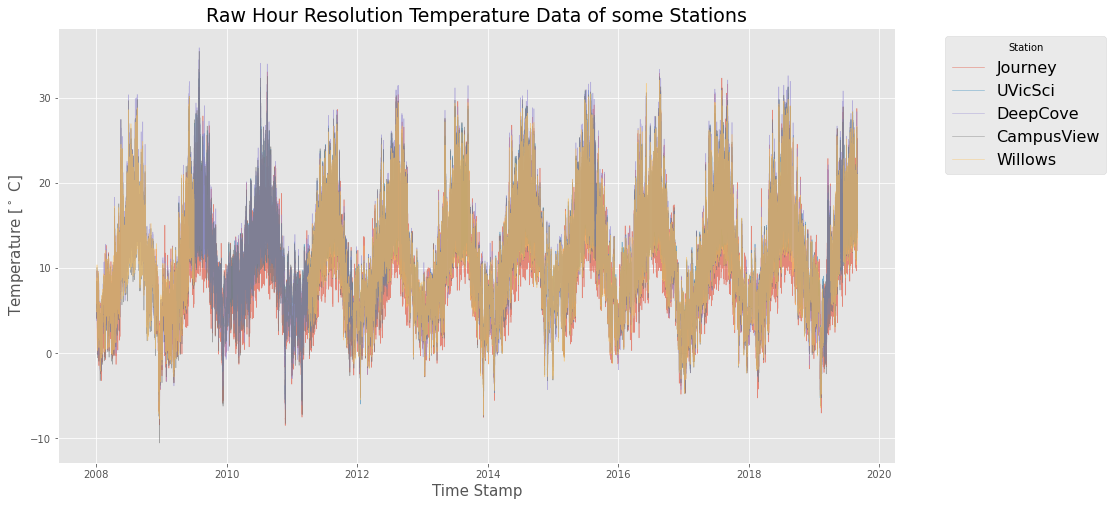

In [50]:
# plot the data from some stations picked at random to check for inconsistencies in the data

#pick stations at random
import random

number_of_stns = 5
rndm_stns = np.random.choice(hour_data.columns, number_of_stns)

plt.close(1);plt.figure(1, figsize=(15,8))
[plt.plot(hour_data[stn], linewidth=0.6, label=stn, alpha=0.6) for stn in rndm_stns]

plt.xlabel('Time Stamp',fontsize=15)
plt.ylabel('Temperature [${^\circ}$ C]',fontsize=15)
plt.title('Raw Hour Resolution Temperature Data of some Stations',fontsize=19)
plt.legend(title='Station', prop={'size': 16}, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.style.use('ggplot')
plt.savefig('./Images/Hour_data_rndm_stns.png')
plt.show()

In [68]:
# Plot location of stations on map

# Load data in lists
coast = np.loadtxt('./Data/Coast.dat')
coast_lon = []
coast_lat = []
for i in range(0,len(coast)):
    coast_lon.append(coast[i][0])
    coast_lat.append(coast[i][1])

# Project the data to make the map
mid = coast_lat[int(len(coast)/2)]
rad = (mid * np.pi) / 180
ratio = np.cos(rad)
inverse = 1/ratio

# recale longitude
for i in range(0,len(station_lon)):
    station_lon[i] = -180 + (station_lon[i] - 180)

nums = np.arange(1,40,1)

plt.close(2);plt.figure(2,figsize=(8,8), facecolor='white') #fig size same as before
ax = plt.gca() #you first need to get the axis handle
ax.set_aspect(inverse) #sets the height to width ratio to 1.5. 

for i in range(len(nums)):
    ax.annotate(ax.annotate(nums[i], (station_lon[i]+0.5, station_lat[i]+0.5), fontsize=9))
plt.plot(coast_lon,coast_lat)
plt.scatter(station_lon,station_lat,color='orangered',s=15)
plt.title('Coastal Weather Data Victoria',fontsize=15)
plt.xlabel('Longitude',fontsize=12.5)
plt.ylabel('Latitude',fontsize=12.5)
plt.savefig("CoastWithStations")
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
plt.style.use('default')
plt.show()

TypeError: annotate() missing 1 required positional argument: 'xy'

In [54]:
print()

[48.9999,
 48.9996,
 48.9996,
 48.9978,
 48.9978,
 48.9969,
 48.9969,
 48.9963,
 48.996,
 48.9958,
 48.9949,
 48.994,
 48.9908,
 48.9899,
 48.989,
 48.9881,
 48.9858,
 48.9849,
 48.984,
 48.9826,
 48.982,
 48.982,
 48.9811,
 48.9811,
 48.9802,
 48.9802,
 48.9796,
 48.9796,
 48.9752,
 48.9752,
 48.9729,
 48.9729,
 48.9711,
 48.9711,
 48.9702,
 48.9702,
 48.9694,
 48.9694,
 48.9688,
 48.9688,
 48.9658,
 48.9641,
 48.9629,
 48.9629,
 48.9632,
 48.9641,
 48.9644,
 48.9644,
 48.9652,
 48.9644,
 48.9644,
 48.9638,
 48.9638,
 48.9629,
 48.9629,
 48.962,
 48.962,
 48.9611,
 48.9611,
 48.9603,
 48.9603,
 48.9594,
 48.9594,
 48.957,
 48.957,
 48.9523,
 48.9518,
 48.95,
 48.9491,
 48.9482,
 48.9474,
 48.9459,
 48.945,
 48.9441,
 48.9432,
 48.9391,
 48.9383,
 48.938,
 48.9377,
 48.9371,
 48.9371,
 48.9362,
 48.9362,
 48.9353,
 48.9353,
 48.9344,
 48.9344,
 48.9336,
 48.9336,
 48.9306,
 48.93,
 48.9295,
 48.9295,
 48.9274,
 48.9256,
 48.9245,
 48.9245,
 48.9233,
 48.9215,
 48.9207,
 48.9198,
 48.91